In [294]:
import pandas as pd
import plotnine as p9
import numpy as np

In [295]:
athletes = pd.read_csv("olympic_athletes.csv")
hosts = pd.read_csv("olympic_hosts.csv")
medals = pd.read_csv("olympic_medals.csv")
results = pd.read_csv("olympic_results.csv")

print(medals.head())
# results_pkl = pd.read_pickle("olympic_results.pkl")

  discipline_title     slug_game    event_title event_gender medal_type  \
0          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   

  participant_type participant_title  \
0         GameTeam             Italy   
1         GameTeam             Italy   
2         GameTeam            Norway   
3         GameTeam            Norway   
4         GameTeam            Sweden   

                                         athlete_url     athlete_full_name  \
0  https://olympics.com/en/athletes/stefania-cons...  Stefania CONSTANTINI   
1      https://olympics.com/en/athletes/amos-mosaner          Amos MOSANER   
2  https://olympics.com/en/athletes/kristin-skaslien      Kristin SKASLIEN

In [296]:
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

print(testerCle(hosts, "game_slug"))
print(hosts.head())

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (53, 7) (lignes, colonnes)
None
          game_slug         game_end_date       game_start_date  \
0      beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1        tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2  pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3          rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4        sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   

        game_location         game_name game_season  game_year  
0               China      Beijing 2022      Winter       2022  
1               Japan        Tokyo 2020      Summer       2020  
2   Republic of Korea  PyeongChang 2018      Winter       2018  
3              Brazil          Rio 2016      Summer       2016  
4  Russian Federation        Sochi 2014      Winter       2014  


In [297]:
results_de = results[(results["country_code"] == "DE") | (results["country_code"] == "DDDE")] 
print(results_de.head())

     discipline_title              event_title     slug_game participant_type  \
119  Freestyle Skiing          Men's Ski Cross  beijing-2022          Athlete   
143  Freestyle Skiing          Men's Ski Cross  beijing-2022          Athlete   
144  Freestyle Skiing          Men's Ski Cross  beijing-2022          Athlete   
145  Freestyle Skiing          Men's Ski Cross  beijing-2022          Athlete   
170  Freestyle Skiing  Women's Freeski Big Air  beijing-2022          Athlete   

    medal_type athletes rank_equal rank_position country_name country_code  \
119        NaN      NaN      False            32      Germany           DE   
143        NaN      NaN      False            21      Germany           DE   
144        NaN      NaN      False            23      Germany           DE   
145        NaN      NaN      False            14      Germany           DE   
170        NaN      NaN      False            18      Germany           DE   

    country_3_letter_code                   

In [298]:
hosts_summer = hosts[hosts.game_season == "Summer"]
print(hosts_summer.head())

      game_slug         game_end_date       game_start_date  game_location  \
1    tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z          Japan   
3      rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z         Brazil   
5   london-2012  2012-08-12T19:00:00Z  2012-07-27T07:00:00Z  Great Britain   
7  beijing-2008  2008-08-24T12:00:00Z  2008-08-08T00:00:00Z          China   
9   athens-2004  2004-08-29T18:00:00Z  2004-08-13T06:00:00Z         Greece   

      game_name game_season  game_year  
1    Tokyo 2020      Summer       2020  
3      Rio 2016      Summer       2016  
5   London 2012      Summer       2012  
7  Beijing 2008      Summer       2008  
9   Athens 2004      Summer       2004  


In [363]:
data = pd.merge(results_de, hosts_summer, left_on="slug_game", right_on="game_slug", how = "inner")

data_medals = data[~data.medal_type.isnull()]
data_medals

total_medals = []
year = []

for i in range(0,len(hosts_summer)*4+12,4):
    total_medals.append(len(data_medals[data_medals.game_year == (2020 - i)]))
    year.append(2020-i)

df_medal_country = pd.DataFrame((zip(total_medals, year)), columns = ['Total_medals', 'Year'])

print(df_medal_country.head())

8892
   Total_medals  Year
0            37  2020
1            42  2016
2            44  2012
3            41  2008
4            49  2004


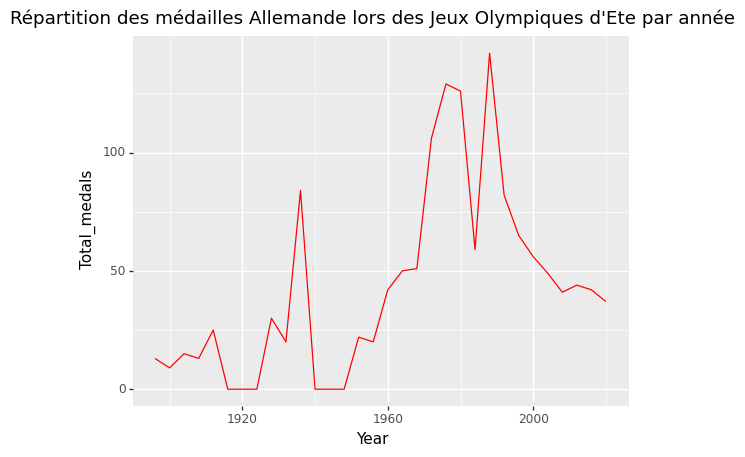

<ggplot: (120005057880)>

In [351]:
plot = p9.ggplot(data=df_medal_country,
           mapping=p9.aes(x="Year", y="Total_medals"))
plot + p9.geom_line(color='red') + p9.ggtitle("Répartition des médailles Allemande lors des Jeux Olympiques d'Ete par année")

In [343]:
for i in range(0,len(hosts_summer)*4+12,4):
    total_medals.append(len(data_medals[data_medals.game_year == (2020 - i)]))
    year.append(2020-i)

medals_de = medals[(medals["country_code"] == "DE") | (medals["country_code"] == "DDDE")] 
data_2 = pd.merge(medals_de, hosts_summer, left_on="slug_game", right_on="game_slug", how = "inner")
test = data_2.athlete_full_name.value_counts()
test.head(12)
top = pd.DataFrame(test)
top.reset_index(inplace = True)
top12_bis = top[:12]
top12_bis.athlete_full_name
top12_bis.rename(columns = {'index':'Athlete', 'athlete_full_name':'Nombre_de_medaille',
                              }, inplace = True)
top12_bis

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6048\1423836582.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Athlete,Nombre_de_medaille
0,Birgit FISCHER,7
1,Isabell WERTH,6
2,Wilfried DIETRICH,5
3,Olaf HEUKRODT,5
4,Ralf SCHUMANN,5
5,Karl-Alfred SCHWARZMANN,5
6,Konrad FREY,5
7,Heike DRECHSLER,5
8,Andreas DITTMER,5
9,Roland MATTHES,5


In [347]:
top12 = top12_bis.Athlete
print(len(top12))
nom = medals_de.athlete_full_name.values.tolist()
medaille_type = medals_de.medal_type.values.tolist()


athlete = []
type_medaille = []

for i in range(len(top12)):
    for j in range(len(medals_de)):
        if nom[j] == top12[i]:
            type_medaille.append(medaille_type[j])
            athlete.append(nom[j])

df_medaille_athlete = pd.DataFrame((zip(athlete, type_medaille)), columns = ['Athlete', 'Type_Medaille'])


12


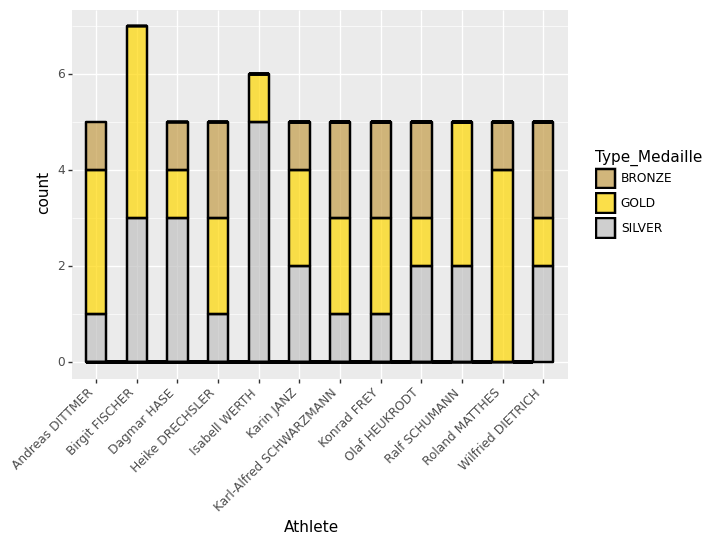

<ggplot: (120004876529)>

In [349]:
(
    p9.ggplot(data=df_medaille_athlete, mapping =  p9.aes(x='Athlete', fill='Type_Medaille'))
    + p9.scale_fill_manual(values=["#C49C48", "#FFD700", "#C0C0C0"])
    + p9.geom_histogram(bins=12, binwidth = 0.5,
                        colour="#000000",
                        size=1,
                        alpha=0.7)  
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
)

In [367]:
data
Total_athlete = []
year = []

for i in range(0,len(hosts_summer)*4+12,4):
    Total_athlete.append(len(data[data.game_year == (2020 - i)]))
    
print(Total_athlete)

data_athlete_medaille = df_medal_country.assign(Total_athlete = total_athlete)

data_athlete_medaille

[249, 272, 283, 266, 296, 316, 316, 322, 473, 258, 255, 367, 423, 335, 210, 178, 133, 220, 0, 0, 0, 231, 70, 122, 0, 0, 0, 126, 78, 61, 60, 88]


,Total_medals,Year,Total_athlete
0,37,2020,249
1,42,2016,272
2,44,2012,283
3,41,2008,266
4,49,2004,296
5,56,2000,316
6,65,1996,316
7,82,1992,322
8,142,1988,473
9,59,1984,258


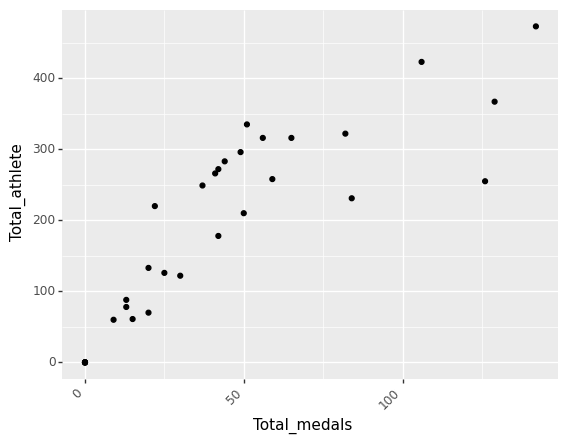

<ggplot: (120005272625)>

In [368]:
(
    p9.ggplot(data=data_athlete_medaille, mapping =  p9.aes(x='Total_medals', y='Total_athlete'))
    + p9.geom_point()  
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
)